In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
# File to Load 
ProductDataLoad = Path("Resources/amazon_products.csv")
CatDataLoad = Path("Resources/amazon_categories.csv")


# Read the category and product datafiles
AmazonProdData = pd.read_csv(ProductDataLoad)
AmazonCatData = pd.read_csv(CatDataLoad)


# Combine the data into a single dataset.
AmazonData = pd.merge(AmazonProdData, AmazonCatData, how="right", on="category_id")
AmazonData.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B08YNTXFJG,Duufin 120 Pieces Acrylic Keychain Blanks Set ...,https://m.media-amazon.com/images/I/71czFH2QUM...,https://www.amazon.com/dp/B08YNTXFJG,4.7,510,9.99,0.0,1,False,50,Beading & Jewelry Making
1,B08DXSF5PZ,"DIY Tray Silicone Resin Mold, Oval Epoxy Resin...",https://m.media-amazon.com/images/I/71ZnrCHA49...,https://www.amazon.com/dp/B08DXSF5PZ,4.6,584,8.99,0.0,1,False,0,Beading & Jewelry Making
2,B096JGXQN5,"GTOTd I Love Rock and Roll Pins Set(18 Pack,2....",https://m.media-amazon.com/images/I/71SOJXp-wJ...,https://www.amazon.com/dp/B096JGXQN5,4.5,245,12.79,0.0,1,False,50,Beading & Jewelry Making
3,B0BZXW1ZGS,Xuhal 100 Pack Plastic Ring Sizer Bulk Reusabl...,https://m.media-amazon.com/images/I/81qD7tFV+r...,https://www.amazon.com/dp/B0BZXW1ZGS,5.0,1,16.99,0.0,1,False,0,Beading & Jewelry Making
4,B0BR8B472F,"Large Dice Resin Molds, 2 Styles Silicone Dice...",https://m.media-amazon.com/images/I/71uDVuhf71...,https://www.amazon.com/dp/B0BR8B472F,4.4,10,15.99,0.0,1,False,50,Beading & Jewelry Making


In [2]:
#Getting a count on how many different Items and Categories there are
ItemCount = len(AmazonData["title"].unique())
print(ItemCount)
CatCount = len(AmazonData["category_name"].unique())
print(CatCount)

1385431
248


In [3]:
#How many proudcts are in each category
perCatCount = AmazonData["category_name"].value_counts()
perCatCount

category_name
Girls' Clothing                                   28619
Boys' Clothing                                    24660
Toys & Games                                      20846
Men's Shoes                                       19822
Women's Handbags                                  18994
                                                  ...  
Smart Home: Lawn and Garden                          76
Smart Home: Voice Assistants and Hubs                50
Smart Home: New Smart Devices                        42
Garment Bags                                         40
Smart Home Thermostats - Compatibility Checker       22
Name: count, Length: 248, dtype: int64

In [4]:
#grabbing the average stars for each category
perCatPopular = AmazonData.groupby("category_name").mean("stars")
#sort by purchased in the last month to see how star ratings and popularity of products is related
perCatPopular.sort_values(["boughtInLastMonth"], ascending = False)

,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
category_name,,,,,,,
Health & Household,4.567541,0.000000,15.295649,11.044019,135.0,0.074586,8477.900552
Personal Care Products,4.448732,0.000000,21.685926,10.049792,52.0,0.029208,3077.401998
Household Supplies,4.545314,0.000000,16.563141,8.666164,130.0,0.026262,2208.547889
Kitchen & Dining,4.544674,0.000000,26.417577,15.619072,170.0,0.057149,2136.890619
Industrial & Scientific,4.554726,0.000000,19.917598,11.162806,162.0,0.091135,1600.124069
...,...,...,...,...,...,...,...
Smart Home: WiFi and Networking,4.201282,0.000000,104.918291,75.000769,189.0,0.004274,0.000000
Smart Home Thermostats - Compatibility Checker,1.204545,0.000000,149.333182,24.724545,194.0,0.000000,0.000000
Tablet Replacement Parts,2.302301,0.029353,41.245744,3.637664,58.0,0.000793,0.000000


In [5]:
perCatPopular = AmazonData.groupby("category_name").mean("isBestSeller")
perCatPopular.sort_values(["boughtInLastMonth"], ascending = False)

,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
category_name,,,,,,,
Health & Household,4.567541,0.000000,15.295649,11.044019,135.0,0.074586,8477.900552
Personal Care Products,4.448732,0.000000,21.685926,10.049792,52.0,0.029208,3077.401998
Household Supplies,4.545314,0.000000,16.563141,8.666164,130.0,0.026262,2208.547889
Kitchen & Dining,4.544674,0.000000,26.417577,15.619072,170.0,0.057149,2136.890619
Industrial & Scientific,4.554726,0.000000,19.917598,11.162806,162.0,0.091135,1600.124069
...,...,...,...,...,...,...,...
Smart Home: WiFi and Networking,4.201282,0.000000,104.918291,75.000769,189.0,0.004274,0.000000
Smart Home Thermostats - Compatibility Checker,1.204545,0.000000,149.333182,24.724545,194.0,0.000000,0.000000
Tablet Replacement Parts,2.302301,0.029353,41.245744,3.637664,58.0,0.000793,0.000000


In [6]:
#Looking at which category had on average the most reviews
perCatReviews = AmazonData.groupby("category_name").mean("reviews")
perCatReviews.sort_values(["reviews"], ascending = False)

,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
category_name,,,,,,,
Smart Home: Security Cameras and Systems,4.238043,7956.112319,117.779130,58.745072,190.0,0.014493,0.724638
Smart Home: Voice Assistants and Hubs,3.282000,2331.440000,64.658200,40.478000,186.0,0.000000,20.000000
Diet & Sports Nutrition,4.315190,2285.848974,26.922143,10.159729,132.0,0.008730,1002.815364
Video Games,4.315782,2276.047646,53.633488,23.816023,255.0,0.016008,173.907721
Home Décor Products,4.423153,2121.436195,20.194154,10.348995,165.0,0.016241,497.417267
...,...,...,...,...,...,...,...
"Hydraulics, Pneumatics & Plumbing",4.049375,0.000000,31.144503,6.438483,147.0,0.006878,7.468761
Industrial & Scientific,4.554726,0.000000,19.917598,11.162806,162.0,0.091135,1600.124069
Industrial Power & Hand Tools,4.459039,0.000000,43.346112,23.347802,146.0,0.011864,168.945573


In [7]:
#seeing which category had the most stars on average
perCatPopular = AmazonData.groupby("category_name").mean("boughtInLastMonth")
perCatPopular.sort_values(["boughtInLastMonth"], ascending = False)

,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
category_name,,,,,,,
Health & Household,4.567541,0.000000,15.295649,11.044019,135.0,0.074586,8477.900552
Personal Care Products,4.448732,0.000000,21.685926,10.049792,52.0,0.029208,3077.401998
Household Supplies,4.545314,0.000000,16.563141,8.666164,130.0,0.026262,2208.547889
Kitchen & Dining,4.544674,0.000000,26.417577,15.619072,170.0,0.057149,2136.890619
Industrial & Scientific,4.554726,0.000000,19.917598,11.162806,162.0,0.091135,1600.124069
...,...,...,...,...,...,...,...
Smart Home: WiFi and Networking,4.201282,0.000000,104.918291,75.000769,189.0,0.004274,0.000000
Smart Home Thermostats - Compatibility Checker,1.204545,0.000000,149.333182,24.724545,194.0,0.000000,0.000000
Tablet Replacement Parts,2.302301,0.029353,41.245744,3.637664,58.0,0.000793,0.000000


In [8]:
#Analysis: Does the quantity of reviews have an impact on how well products sell? Seemingly no, perhaps within the categories, but the most popular
# categories in the last month are all averaging 0 reviews per item, but each product averages nearly 8.5 thousand items sold per product where as 
# categories that have the most reviews seem to average at most 1 thousand items sold per product but the highest reviewed category only on average sold
# 0.7 items per product in the category. What seems to matter more in terms of selling lots of inventory is to have more consumable inventory. Personal
# Care Products like toothpaste, shampoo, etc. have a limited amount of usage before it needs to be replaced. Smarthome Security cameras and systems?
# Hopefully doesn't need to be replaced as often, but reviews matter more. Also how difficult of a market it is to penetrate might also have an impact.
# Using Smarthome Security there's only a handful, and of them Ring is a dominant producer in the field skewing the popularity. Maybe Rings sells 60, 
# items a month, but there's 99 competitors that collectively sell 10 items a month. Sure 70 items are sold a month but items per product it average 0.7.
# Lastly, reviews could also be negative, and so a lot of reviews could end up hurting a poorly reviewed product leading to less sales making stars a better indicator.

In [9]:
#Now I want to look at profitiablity by mulitplying the price by bought in last month
ProfitCalc = AmazonData["price"]*AmazonData["boughtInLastMonth"]
ProfitCalc

0          499.5
1            0.0
2          639.5
3            0.0
4          799.5
           ...  
1426332      0.0
1426333    899.5
1426334      0.0
1426335      0.0
1426336      0.0
Length: 1426337, dtype: float64

In [27]:
#making a new dataframe that is basically AmazonData, but with this new profit column
#this way if we want to look at individual products we can, but can also look at the more general by category approach we've been doing
ADProfit = pd.DataFrame(
        { 
            'title': AmazonData['title'],
            'category_id': AmazonData['category_id'],
          'category_name' : AmazonData["category_name"],
          'stars' : AmazonData["stars"],
          'reviews' : AmazonData["reviews"],
          'price' : AmazonData["price"],
          'boughtInLastMonth' : AmazonData["boughtInLastMonth"], 
          'Profit': ProfitCalc,
         }
)

ADProfit.head()

,title,category_id,category_name,stars,reviews,price,boughtInLastMonth,Profit
0,Duufin 120 Pieces Acrylic Keychain Blanks Set ...,1,Beading & Jewelry Making,4.7,510,9.99,50,499.5
1,"DIY Tray Silicone Resin Mold, Oval Epoxy Resin...",1,Beading & Jewelry Making,4.6,584,8.99,0,0.0
2,"GTOTd I Love Rock and Roll Pins Set(18 Pack,2....",1,Beading & Jewelry Making,4.5,245,12.79,50,639.5
3,Xuhal 100 Pack Plastic Ring Sizer Bulk Reusabl...,1,Beading & Jewelry Making,5.0,1,16.99,0,0.0
4,"Large Dice Resin Molds, 2 Styles Silicone Dice...",1,Beading & Jewelry Making,4.4,10,15.99,50,799.5


In [11]:
perCatProfits = ADProfit.groupby("category_name").mean('Profit')
TopTenProfitCat = perCatProfits.sort_values(["Profit"], ascending = False).head(10)
TopTenProfitCat

,stars,reviews,price,boughtInLastMonth,Profit
category_name,,,,,
Health & Household,4.567541,0.0,15.295649,8477.900552,129689.915746
Kitchen & Dining,4.544674,0.0,26.417577,2136.890619,54729.534617
Personal Care Products,4.448732,0.0,21.685926,3077.401998,46500.683705
Smart Home: Vacuums and Mops,3.935897,0.0,221.128077,199.358974,44381.980769
Household Supplies,4.545314,0.0,16.563141,2208.547889,34087.993563
Tools & Home Improvement,4.462653,0.0,33.672682,1247.178592,32342.051193
Smart Home: Other Solutions,4.355714,0.0,101.609429,223.571429,29473.414286
Industrial & Scientific,4.554726,0.0,19.917598,1600.124069,29369.772502
Sports & Outdoors,4.499774,0.0,29.037717,1118.933685,28730.716466


In [19]:
TopTenProfitCat['Profit']

category_name
Health & Household               129689.915746
Kitchen & Dining                  54729.534617
Personal Care Products            46500.683705
Smart Home: Vacuums and Mops      44381.980769
Household Supplies                34087.993563
Tools & Home Improvement          32342.051193
Smart Home: Other Solutions       29473.414286
Industrial & Scientific           29369.772502
Sports & Outdoors                 28730.716466
Smart Home: New Smart Devices     25401.071429
Name: Profit, dtype: float64

In [49]:
# Group by category_id and include category_name in the summary
ProfSummary = ADProfit.groupby('category_id').agg(
    category_name=('category_name', 'first'),  # Include category_name
    average_stars=('stars', 'mean'),  # Calculate average stars
    average_price=('price', 'mean'),          # Calculate average price
    average_prof=('Profit', 'mean'),             # Calculate average profit
    product_count=('title', 'count'),         # Count the number of products
    total_bought=('boughtInLastMonth', 'sum') # Total items bought in last month
).reset_index()

# Display the final summary
print(ProfSummary)

     category_id                                    category_name  \
0              1                         Beading & Jewelry Making   
1              2                                Fabric Decorating   
2              3                      Knitting & Crochet Supplies   
3              4                             Printmaking Supplies   
4              5                 Scrapbooking & Stamping Supplies   
..           ...                                              ...   
243          262  Xbox Series X & S Consoles, Games & Accessories   
244          263                           PC Games & Accessories   
245          264                     Baby Girls' Clothing & Shoes   
246          265                            Boys' School Uniforms   
247          270                                     Toys & Games   

     average_stars  average_price  average_prof  product_count  total_bought  
0         4.371926      15.615846   1844.588588           8246       1099750  
1         3.4

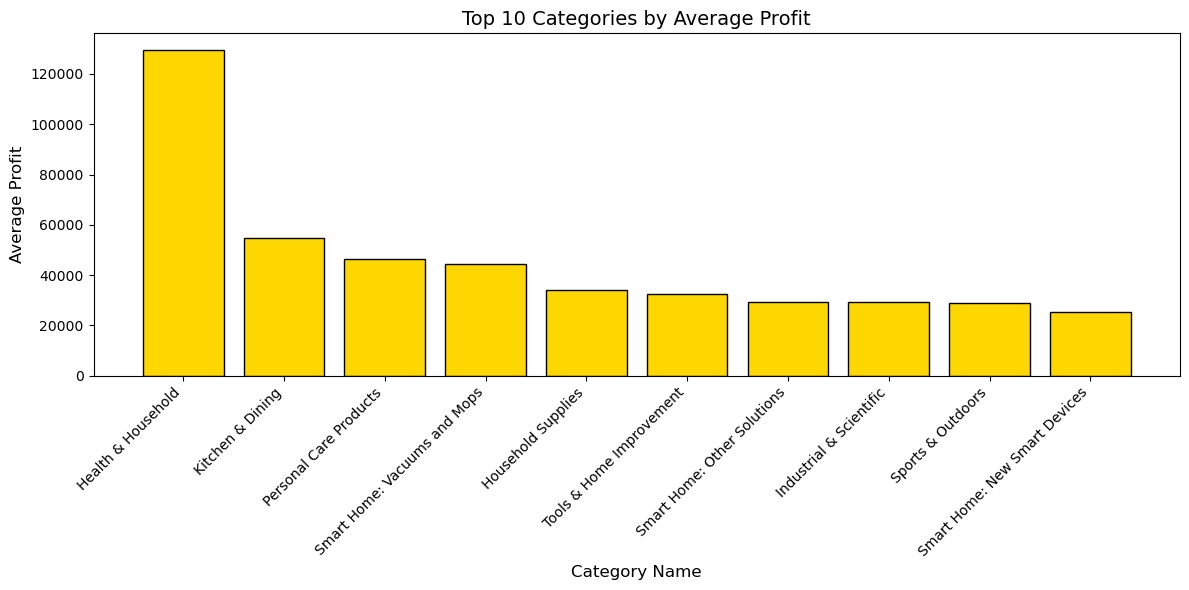

In [47]:
# Sort by average price and select top N categories
# Number of top categories to display
top_n = 10  # Adjust this to show more or fewer categories

# Sort by average price and select the top N categories
top_categories = ProfSummary.nlargest(top_n, 'average_prof')

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_categories['category_name'], top_categories['average_prof'], color='gold', edgecolor = 'black')

# Adding labels and title
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Average Profit', fontsize=12)
plt.title(f'Top {top_n} Categories by Average Profit', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

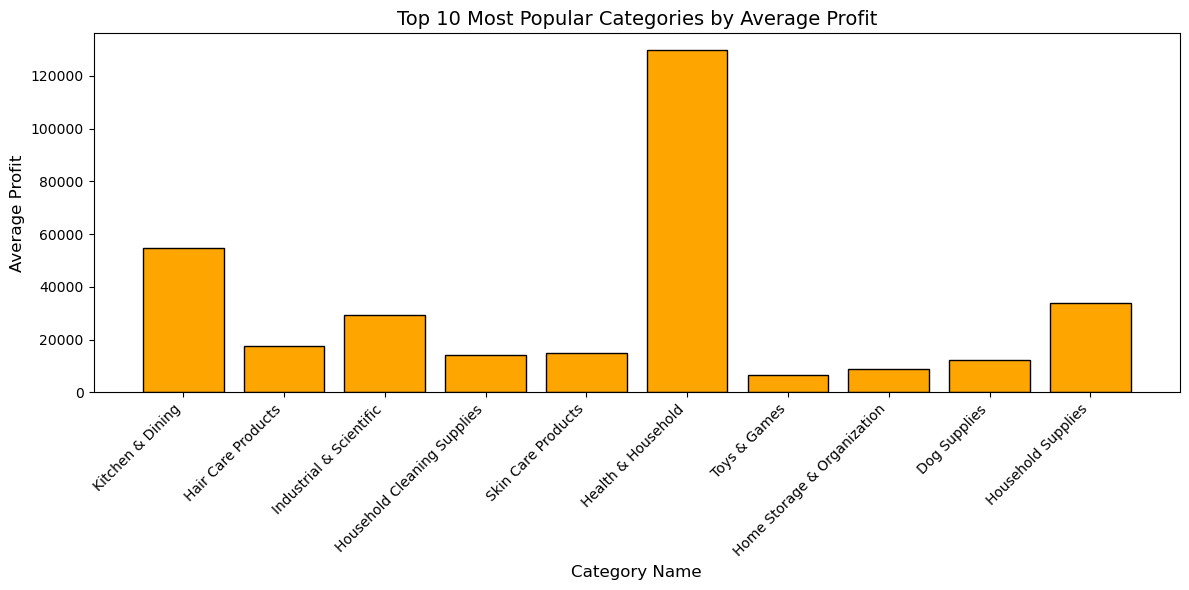

In [61]:
# Sort by average price and select top N categories
# Number of top categories to display
top_n = 10  # Adjust this to show more or fewer categories

# Sort by average price and select the top N categories
top_categories = ProfSummary.nlargest(top_n, 'total_bought')

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_categories['category_name'], top_categories['average_prof'], color='orange', edgecolor = 'black')

# Adding labels and title
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Average Profit', fontsize=12)
plt.title(f'Top {top_n} Most Popular Categories by Average Profit', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()